<a href="https://colab.research.google.com/github/PawanKrGunjan/Image-Processing/blob/main/Road%20Lane%20Detection/Road_Lane_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

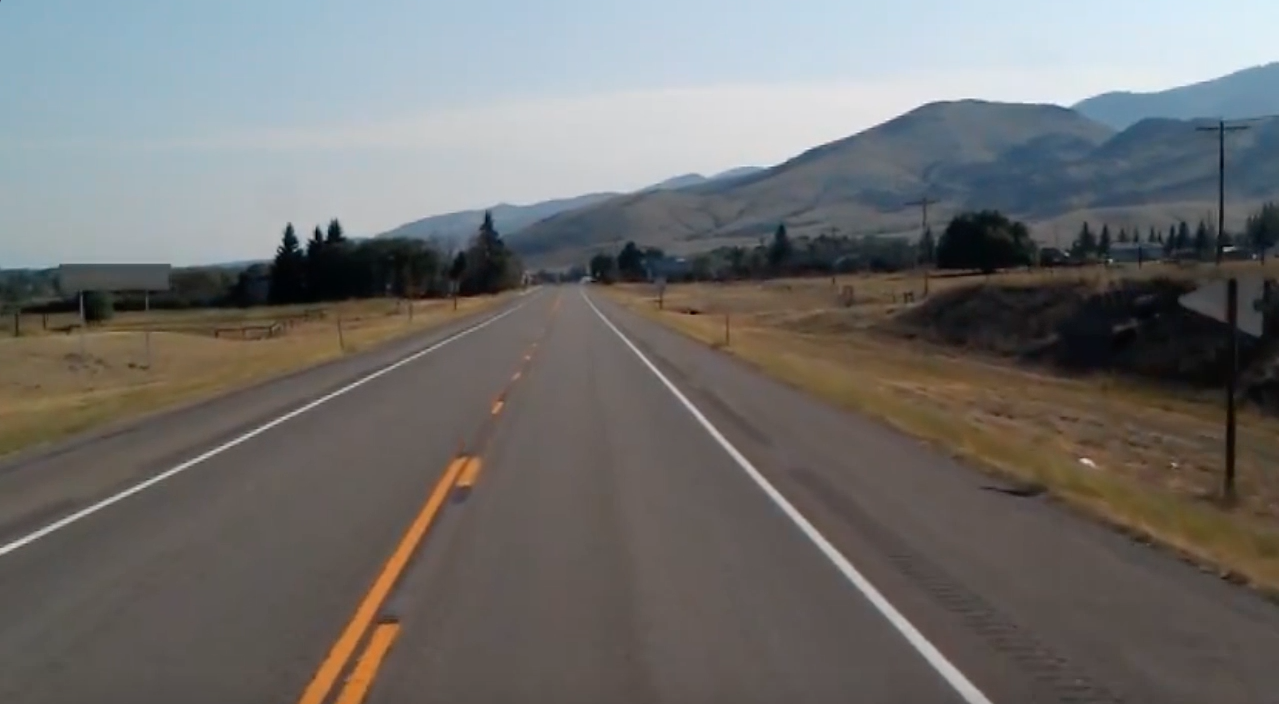

In [4]:
video_link = 'https://www.youtube.com/watch?v=1dE9FHpTOEc'
image = cv2.imread('/content/test_image.jpg')
cv2_imshow(image)

## Convert the original image into a grayscale image

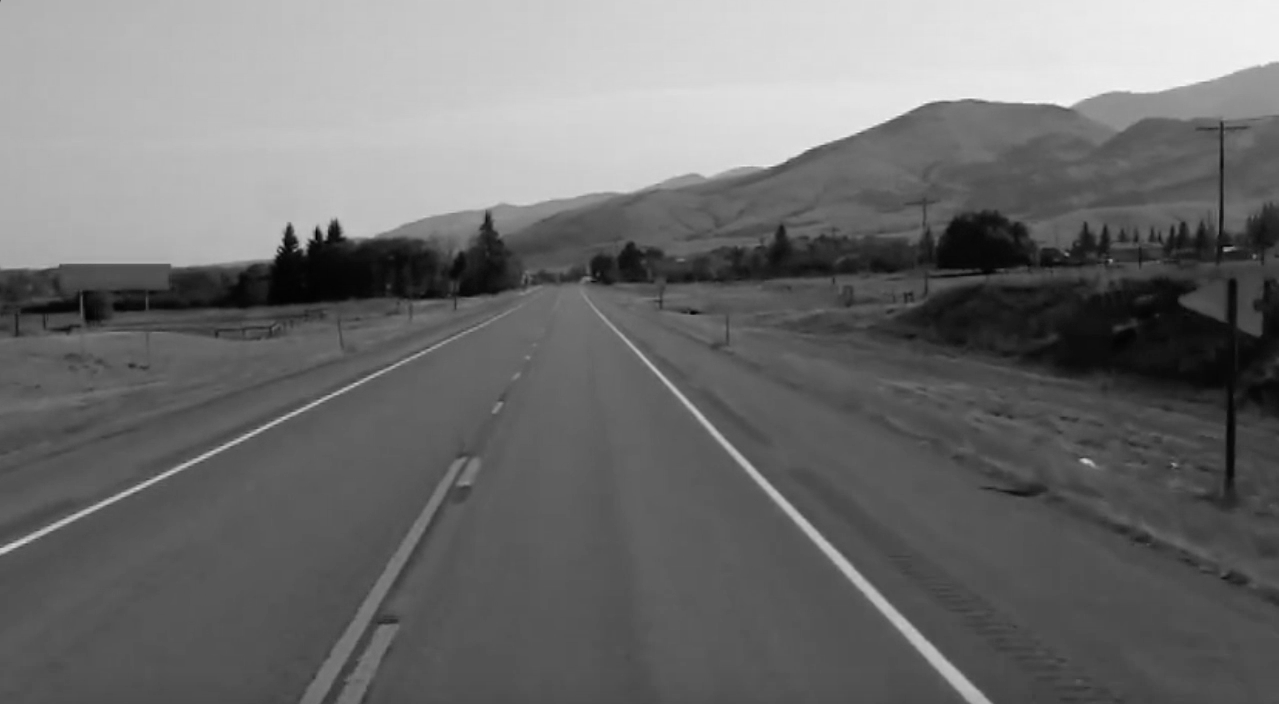

In [5]:
roadLaneImage = np.copy(image)
grayScaleImage = cv2.cvtColor(roadLaneImage, cv2.COLOR_RGB2GRAY)
cv2_imshow(grayScaleImage)

## Smothning the image

[GaussianBlur](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa)

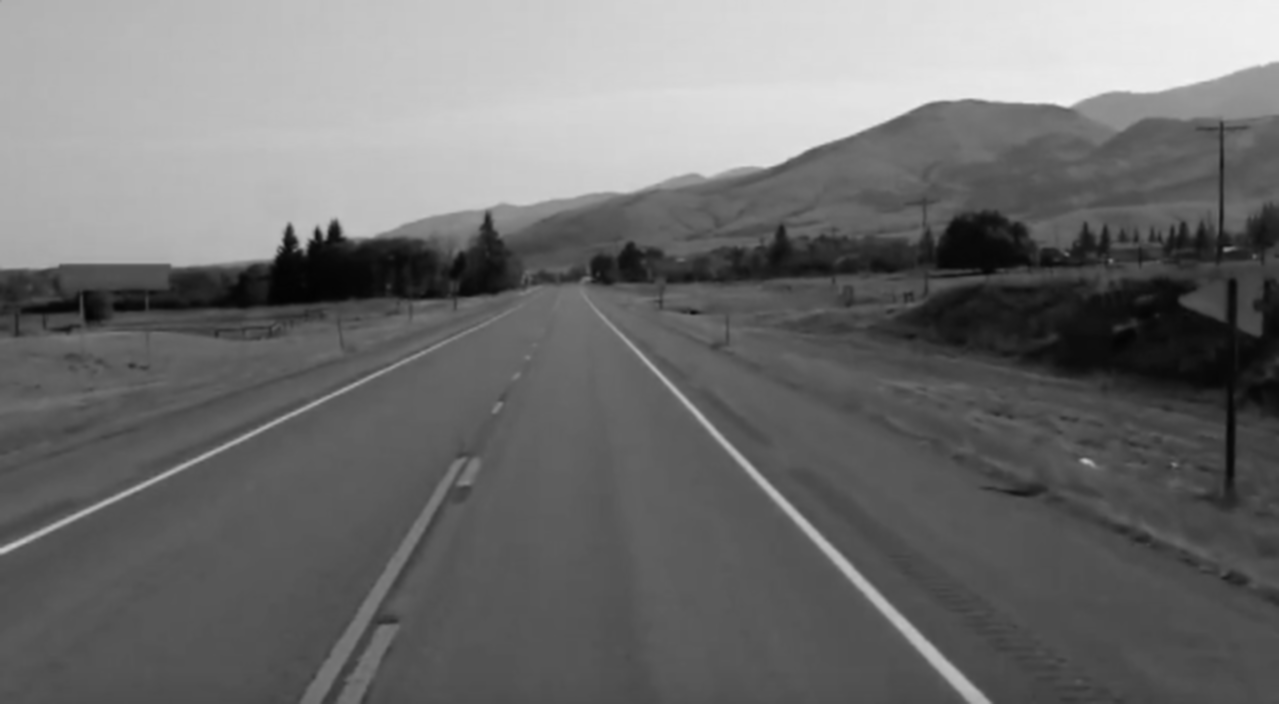

In [6]:
blur = cv2.GaussianBlur(grayScaleImage, (5, 5), 0)
cv2_imshow(blur)

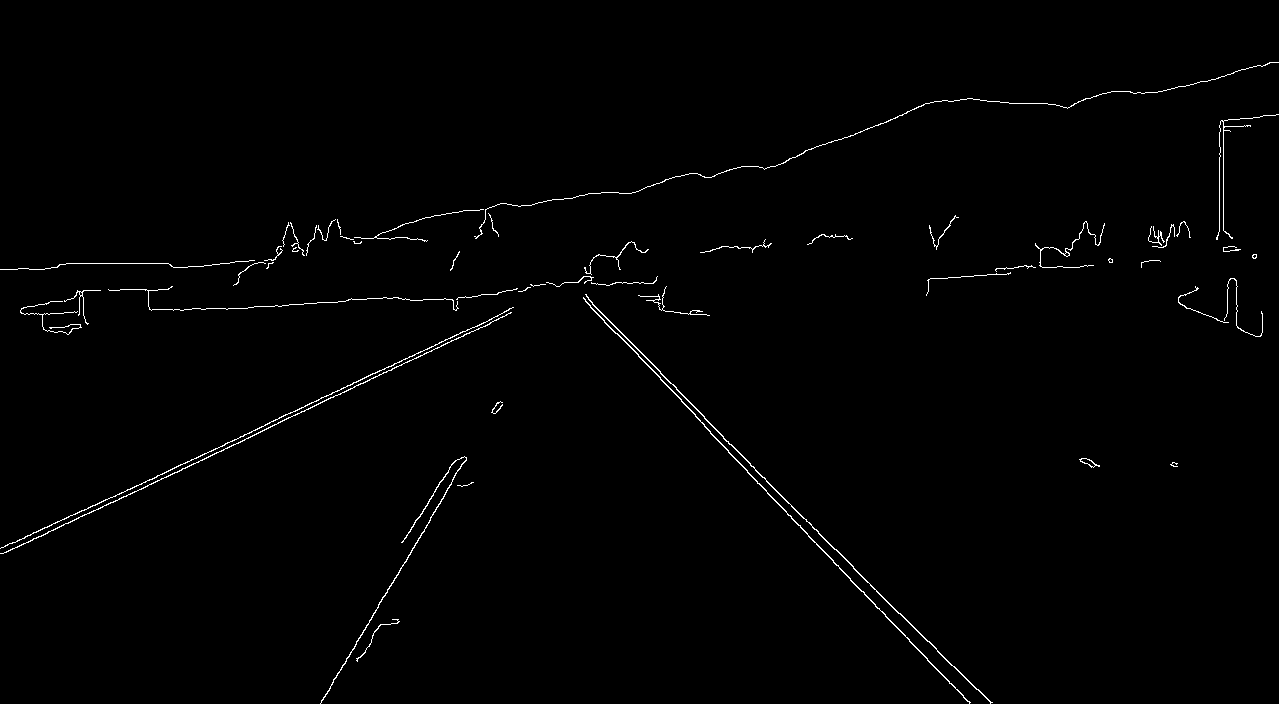

In [7]:
minThreshold = 50
maxThreshold = 150
canny = cv2.Canny(blur, minThreshold, maxThreshold)
cv2_imshow(canny)

In [8]:
print(image.shape)
print(roadLaneImage.shape)
print(blur.shape)
print(canny.shape)

(704, 1279, 3)
(704, 1279, 3)
(704, 1279)
(704, 1279)


In [9]:
image[0,:,:]

array([[116,  91,  75],
       [194, 174, 134],
       [194, 174, 134],
       ...,
       [248, 238, 215],
       [248, 238, 215],
       [248, 238, 215]], dtype=uint8)

In [10]:
roadLaneImage[0,:,:]

array([[116,  91,  75],
       [194, 174, 134],
       [194, 174, 134],
       ...,
       [248, 238, 215],
       [248, 238, 215],
       [248, 238, 215]], dtype=uint8)

In [11]:
blur[0,:]

array([156, 163, 172, ..., 238, 238, 238], dtype=uint8)

In [12]:
canny[0,:]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

## Region of interest

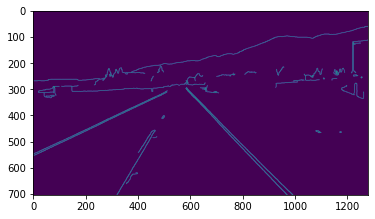

In [13]:
import matplotlib.pyplot as plt
plt.imshow(canny)
plt.show()

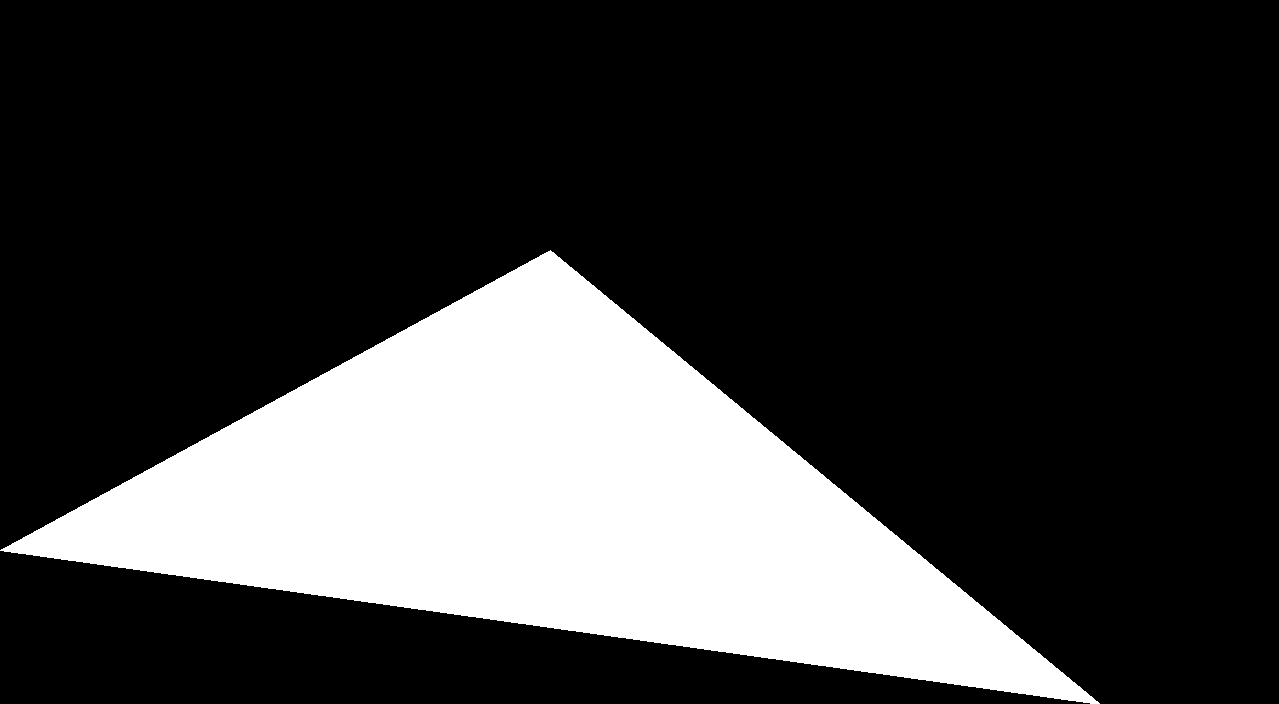

In [17]:
def region_of_interest(image):
  height = image.shape[0]
  polygon = np.array([
      [(0, 550), (1100, height), (550, 250)]
  ])
  mask = np.zeros_like(image)
  #print("Masked data", mask)
  cv2.fillPoly(mask, polygon, 255)
  return mask

croppedImage1 = cv2_imshow(region_of_interest(canny))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


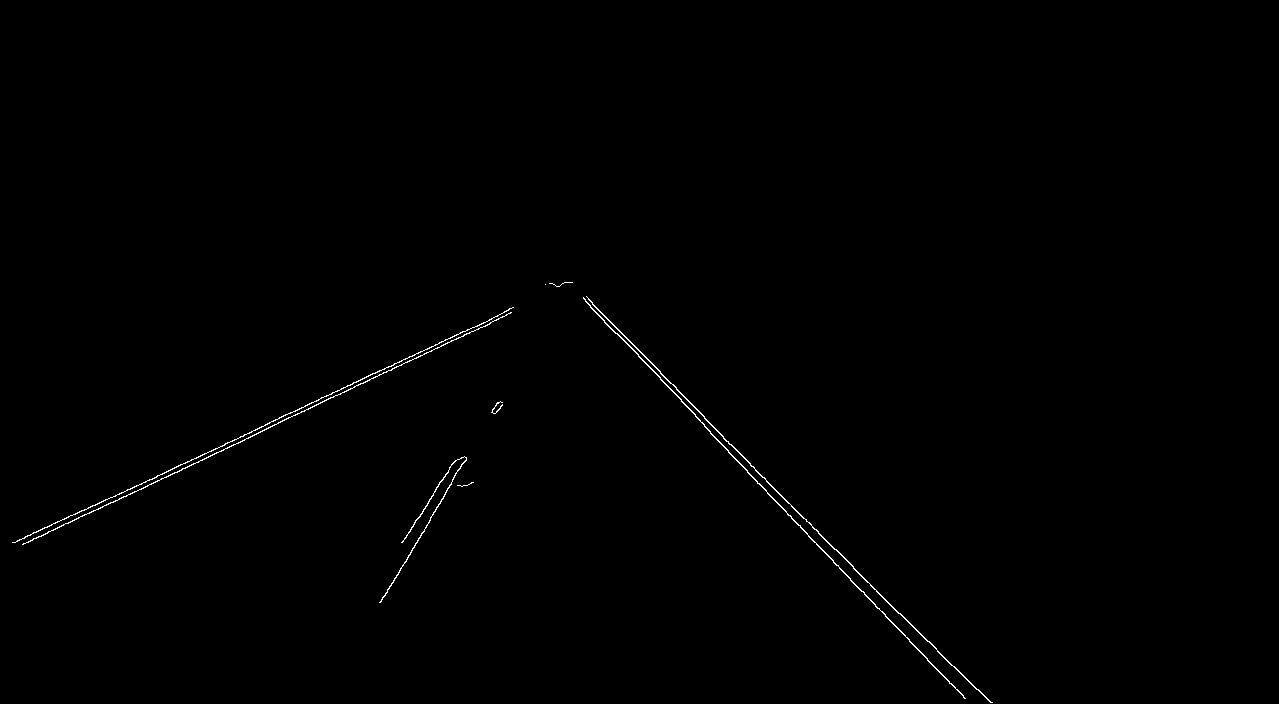

In [18]:
def Region_of_interest(image):
  height = image.shape[0]
  polygon = np.array([
      [(0, 540), (1000, height), (565, 275)]
  ])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, polygon, 255)
  masked_image = cv2.bitwise_and(image, mask)
  return masked_image

croppedImage = Region_of_interest(canny)
print(croppedImage)
cv2_imshow(croppedImage)

## Finding the lane lines using hough tranformation

In [19]:
def display(image, lines):
  ## line_images is black image
  ## Dimension is same as the original image
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      #print(line)
      x1, y1, x2, y2 = line.reshape(4)
      #print(x1)
      ## (255, 0, 0) = (Blue, Green, Red) 
      ## 10 = line thickness
      cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
  return line_image

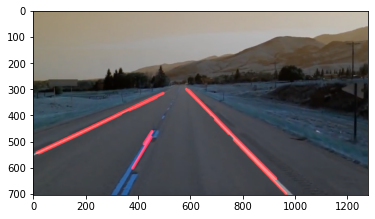

In [21]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid - 1
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 100     # minimum number of votes (intersections in Hough grid cell) - 2
min_line_length = 40 # minimum number of pixels making up a line - 40
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(croppedImage, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
line_image = display(roadLaneImage, lines)

# Draw the lines on the edge image
## Blending the two images with a given threshold value
lines_edges = cv2.addWeighted(roadLaneImage, 0.8, line_image, 1, 1)


plt.imshow(lines_edges)

plt.show()

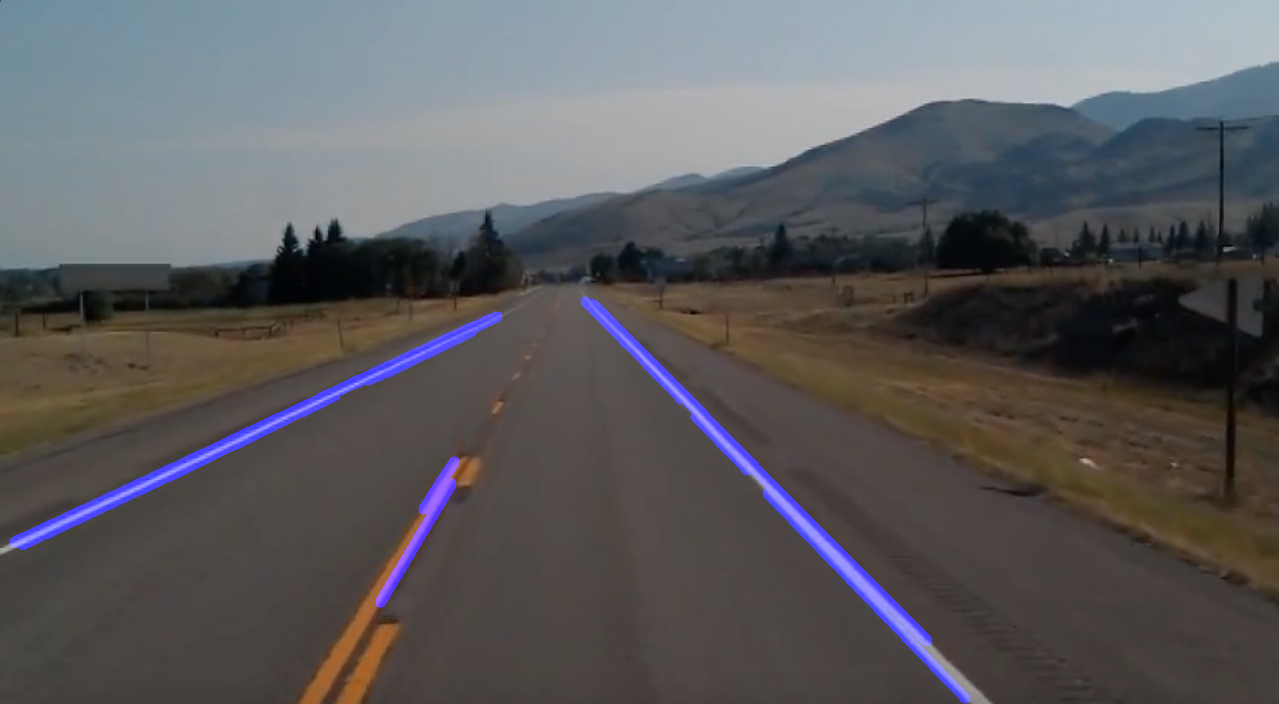

In [22]:
cv2_imshow(lines_edges)